In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

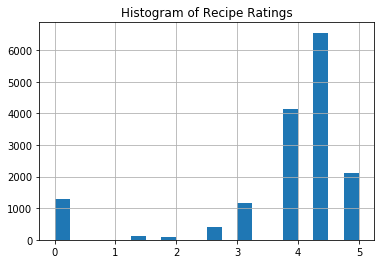

In [89]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [ ]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

In [91]:
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)

In [8]:
from sklearn.svm import SVR
svr = SVR()

X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Around 5-7 mins. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

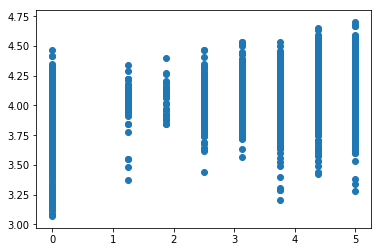

In [9]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [10]:
print(svr.score(X, Y))

-0.003978314483867651


In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

In [94]:
#Drop nan values from nutritional information

raw_data = raw_data.dropna()
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

In [95]:
X = raw_data.drop(['title','rating'], 1).sample(frac=0.3, replace=True, random_state=1).dropna()
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)

In [96]:
 X.head()

,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
16849,999.0,133.0,36.0,2343.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,78.0,1.0,6.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15339,3616.0,129.0,310.0,833.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6516,39.0,1.0,3.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1134,353.0,39.0,7.0,1662.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
list(X.columns)

['calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisket',
 'broccoli',
 'b

In [98]:
# convert target to binary
Z = []
for i in Y:
    if i>4:
        Z.append('good')
    else:
        Z.append('bad')
Y = np.array(Z)

In [99]:
from sklearn.svm import SVC
svm = SVC(gamma='auto',random_state=20)

In [100]:
# Select 30 best features
import sklearn.feature_selection 
select =sklearn.feature_selection.SelectKBest(k=30)
selected_features = select.fit(X, Y)
indicies_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indicies_selected]
print(colnames_selected)
X = X[colnames_selected] 

['alcoholic', 'arugula', 'bon appétit', 'broccoli', 'cake', 'cocktail', 'cocktail party', 'cranberry', 'dessert', 'dinner', 'drink', 'fall', 'gin', 'goat cheese', 'gourmet', 'grill/barbecue', 'house & garden', 'low carb', 'pasta', 'peanut free', 'quick & easy', 'radish', 'roast', 'rum', 'soy free', 'spirit', 'tarragon', 'thanksgiving', 'tree nut free', 'vegan']


c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 10  11  18  22  51  62  84  86  94  95  97 109 136 157 165 166 170 184
 199 200 203 206 217 225 227 229 238 247 248 251 258 260 264 267 269 273
 284 289 292 295 298 312 322 323 339 340 353 355 357 367 368 373 376 377
 380 382 385 390 398 401 404 418 432 441 456 467 480 483 491 493 497 499
 505 510 520 528 529 545 567 568 571 595 603 606 608 616 618 647 656 657
 663 673] are constant.
  UserWarning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [101]:
svm.fit(X,Y) 
from sklearn.model_selection import cross_val_score

In [102]:
print(svm.score(X, Y))
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X, Y, cv=5)

0.5889892834629123


array([0.58718487, 0.58718487, 0.58298319, 0.56092437, 0.57202944])

In [103]:
# GridSearchCV for best parameters
from sklearn.model_selection import GridSearchCV
param_grid = dict(kernel=['linear', 'poly', 'rbf', 'sigmoid'],C=np.arange(.1,10,.1))
grid = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid.fit(X, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=20, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': array([0.1, 0.2, ..., 9.8, 9.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [104]:
print(grid.best_params_)
print(grid.best_score_ )

{'C': 7.6, 'kernel': 'rbf'}
0.5923513343139315


In [113]:
svm = SVC(gamma='auto',random_state=20, kernel='rbf',C=7.6)
svm.fit(X,Y)

SVC(C=7.6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=20, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
print(svm.score(X, Y))
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X, Y, cv=5)

0.6118932548854802


array([0.58613445, 0.62605042, 0.59348739, 0.56617647, 0.58990536])

In [115]:
y_pred = svm.predict(X)
print(pd.crosstab(y_pred, Y))


col_0   bad  good
row_0            
bad     838   536
good   1311  2074


In [116]:
# Classification report

from sklearn.metrics import classification_report
y_pred = svm.predict(X)
target_names = ['bad','good']
print(classification_report(Y,y_pred, target_names=target_names))

              precision    recall  f1-score   support

         bad       0.61      0.39      0.48      2149
        good       0.61      0.79      0.69      2610

   micro avg       0.61      0.61      0.61      4759
   macro avg       0.61      0.59      0.58      4759
weighted avg       0.61      0.61      0.59      4759

